<a href="https://colab.research.google.com/github/Nabina-Manna/nabina/blob/master/NABINA_MANNA_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project: Marketing Campaign for Banking Products** 
(Batch: 29th July'20)

*Project submitted by*: **NABINA MANNA **

Email id:  nabinam@gmail.com



---



---








# **Project Background**

Nowadays, marketing spending in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

## **Main Objective**: Increase the effectiveness of the bank's product campaign

## **Import Libraries and Dataset**

In [282]:
import pandas as pd                  # Pandas: For reading the CSV Dataset file, creating DataFrames and performing analysis
import numpy as np                   # NumPy: For suitable array operations in an easier way
import seaborn as sns                # Seaborn: For the purpose of visualization of data using various plots
import matplotlib.pyplot as plt      # Matplotlib: For plotting the graphs
%matplotlib inline
# SciKit learn: The Python library for scientific ML techniques
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
sns.set_style("white")               # The plots color style is set to 'white'
pd.options.mode.chained_assignment = None

In [283]:
dc = pd.read_excel('datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx')
df = pd.DataFrame(dc)

In [284]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [285]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


# **Data Summary**

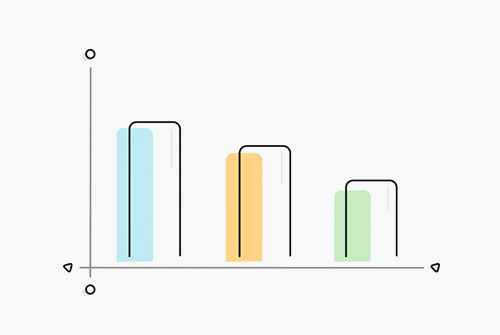

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [287]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [288]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [289]:
df.shape

(5000, 14)

In [290]:
print(df.index)
print('')
print(df.columns)

RangeIndex(start=0, stop=5000, step=1)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [291]:
df[df.isnull()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [292]:
df.skew(numeric_only=True)

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598457
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [293]:
df[df<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [294]:
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# **Data Cleaning**

In [295]:
df[df['Experience'] < 0]['Experience'].count()

52

In [296]:
# Setting the negative values equal to the Median
lmdvalue = int(df['Experience'].median())
for i in range(len(df)):
    if df['Experience'].iloc[i] < 0:
        df['Experience'].iloc[i] = lmdvalue

In [297]:
df[df['Experience'] < 0]['Experience'].count()

0

In [298]:
df.set_index(['ID'], inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [299]:
# To avoid the inconvenience, let's lowercase all the column labels
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

In [300]:

df.nunique()

age                    45
experience             44
income                162
zip code              467
family                  4
ccavg                 108
education               3
mortgage              347
personal loan           2
securities account      2
cd account              2
online                  2
creditcard              2
dtype: int64

 Features or Variables-

1) ID: We have already set this as our Index column. Can be safely omitted from EDA.

2) Age: The Customer's age is a Numerical data of type Interval.

3) Income: Annual Income of customers is a Numerical data of type Ordinal. One of the key feature for our Model prediction.

4) ZIP Code: Home address of the Customers. Need not be considered in EDA.

5) Family: Family size of the customer. Need not be considered in EDA.

6) CC Avg.: Credit cards spending per month ($000). This is a Numerical data type which will give us an idea overall economic level of a Customer.

7) Education: This is a Nominal categorical data type.

8) Mortgage: This Numerical data type gives the value of House mortgage.

9) Personal Load: This is our feature to be predicted. The data in the column is categorical and nominal.

10) Securities Account: This Nominal Categorical data type indicates if the Customer has an account in the bank.

11) CD Account: This is one of our Categorical data columns.

12) Online: This Nominal Categorical data type tells if the Customer has an Online Account.

13) Credit Card: This Nominal Categotical data value tells about possession of Credit card by the Customer.

With this, we can broadly divide our Dataset into

A) Numerical: ['age', 'experience', 'income', 'zip code', 'family', 'ccavg', education', 'mortgage']

B) Categorical: ['personal loan', 'securities account', 'cd account', 'online', 'creditcard']

In [301]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

In [302]:
numeric_features.head()

,age,experience,income,zip code,family,ccavg,education,mortgage,personal loan,securities account,cd account,online,creditcard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [303]:
# Finding the number of people with zero Mortgage value
df[df['mortgage'] == 0]['mortgage'].count()


3462

In [304]:
# Finding the number of people with no Credit card spending per month
df[df['ccavg'] == 0]['ccavg'].count()

106

In [305]:
df['education'].value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [306]:
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [307]:
df['securities account'].value_counts()

0    4478
1     522
Name: securities account, dtype: int64

In [308]:
df['cd account'].value_counts()

0    4698
1     302
Name: cd account, dtype: int64

In [309]:
df['online'].value_counts()

1    2984
0    2016
Name: online, dtype: int64

In [310]:
df['creditcard'].value_counts()

0    3530
1    1470
Name: creditcard, dtype: int64

In [311]:
df_ser = df[['personal loan', 'securities account', 'cd account', 'online', 'creditcard']]
df_serg= df_ser.groupby('personal loan').sum()
df_serg

,securities account,cd account,online,creditcard
personal loan,,,,
0,462,162,2693,1327
1,60,140,291,143


In [312]:
df_serg.describe().T

,count,mean,std,min,25%,50%,75%,max
securities account,2.0,261.0,284.256926,60.0,160.5,261.0,361.5,462.0
cd account,2.0,151.0,15.556349,140.0,145.5,151.0,156.5,162.0
online,2.0,1492.0,1698.470488,291.0,891.5,1492.0,2092.5,2693.0
creditcard,2.0,735.0,837.214429,143.0,439.0,735.0,1031.0,1327.0


Univariate Analysis using different plots:

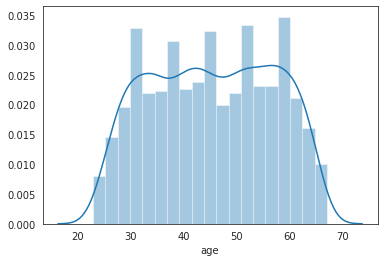

In [313]:
sns.distplot(df['age'], kde=True);

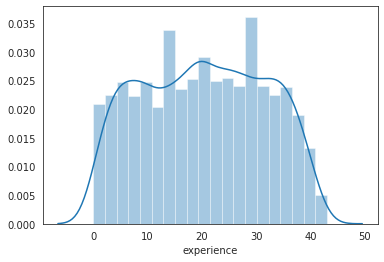

In [314]:
sns.distplot(df['experience']);

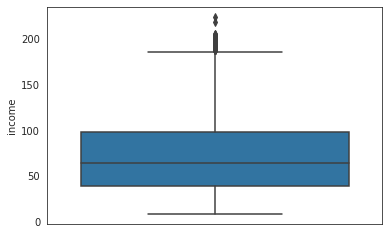

In [315]:
sns.boxplot(df['income'], orient='vertical')

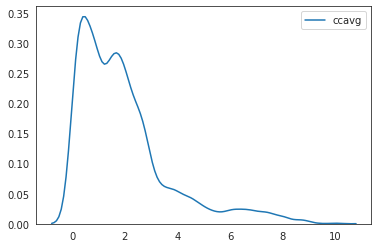

In [316]:
sns.kdeplot(df['ccavg']);

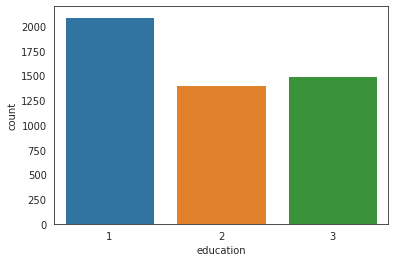

In [317]:
sns.countplot(df['education']);

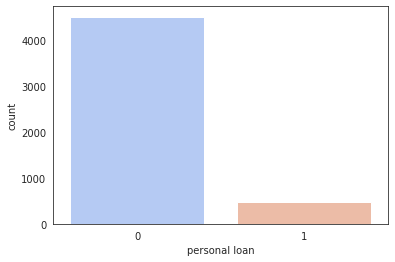

In [318]:
sns.countplot(df['personal loan'], palette='coolwarm');

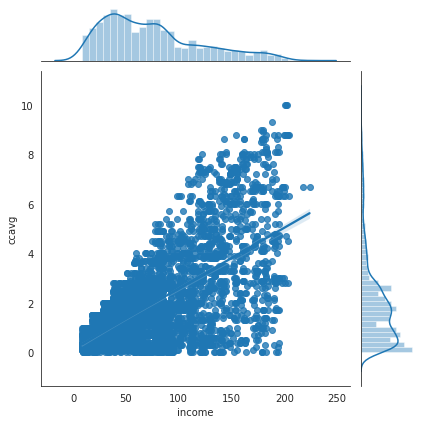

In [319]:
sns.jointplot(x='income',y='ccavg',data=df,kind='reg');

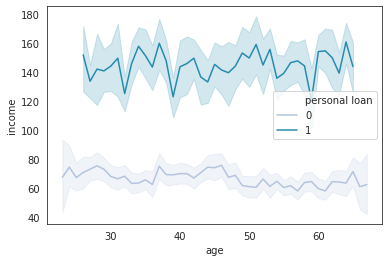

In [320]:
sns.lineplot(x="age", y="income", hue='personal loan', data=df,palette='PuBuGn');

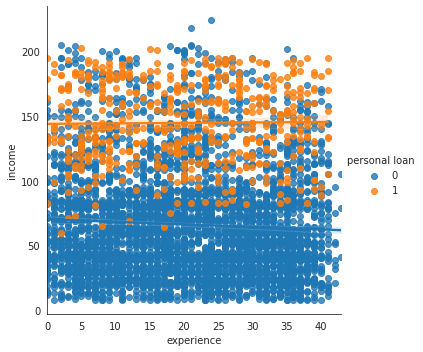

In [321]:
sns.lmplot(x='experience', y='income', hue='personal loan', data=df);

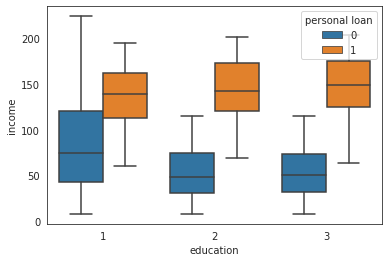

In [322]:
sns.boxplot(x='education', y='income', hue='personal loan', data=df);

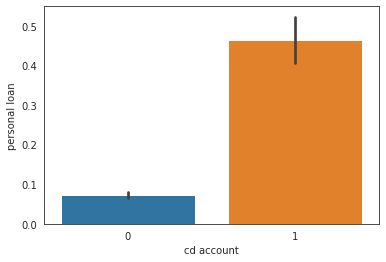

In [323]:
sns.barplot(x='cd account', y='personal loan', data=df);

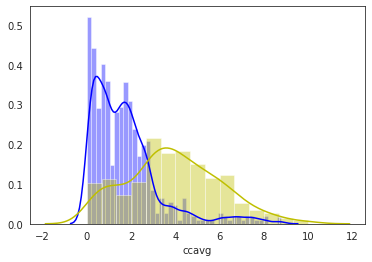

In [324]:
sns.distplot( df[df['personal loan']== 0]['ccavg'], color = 'b');
sns.distplot( df[df['personal loan'] == 1]['ccavg'], color = 'y');


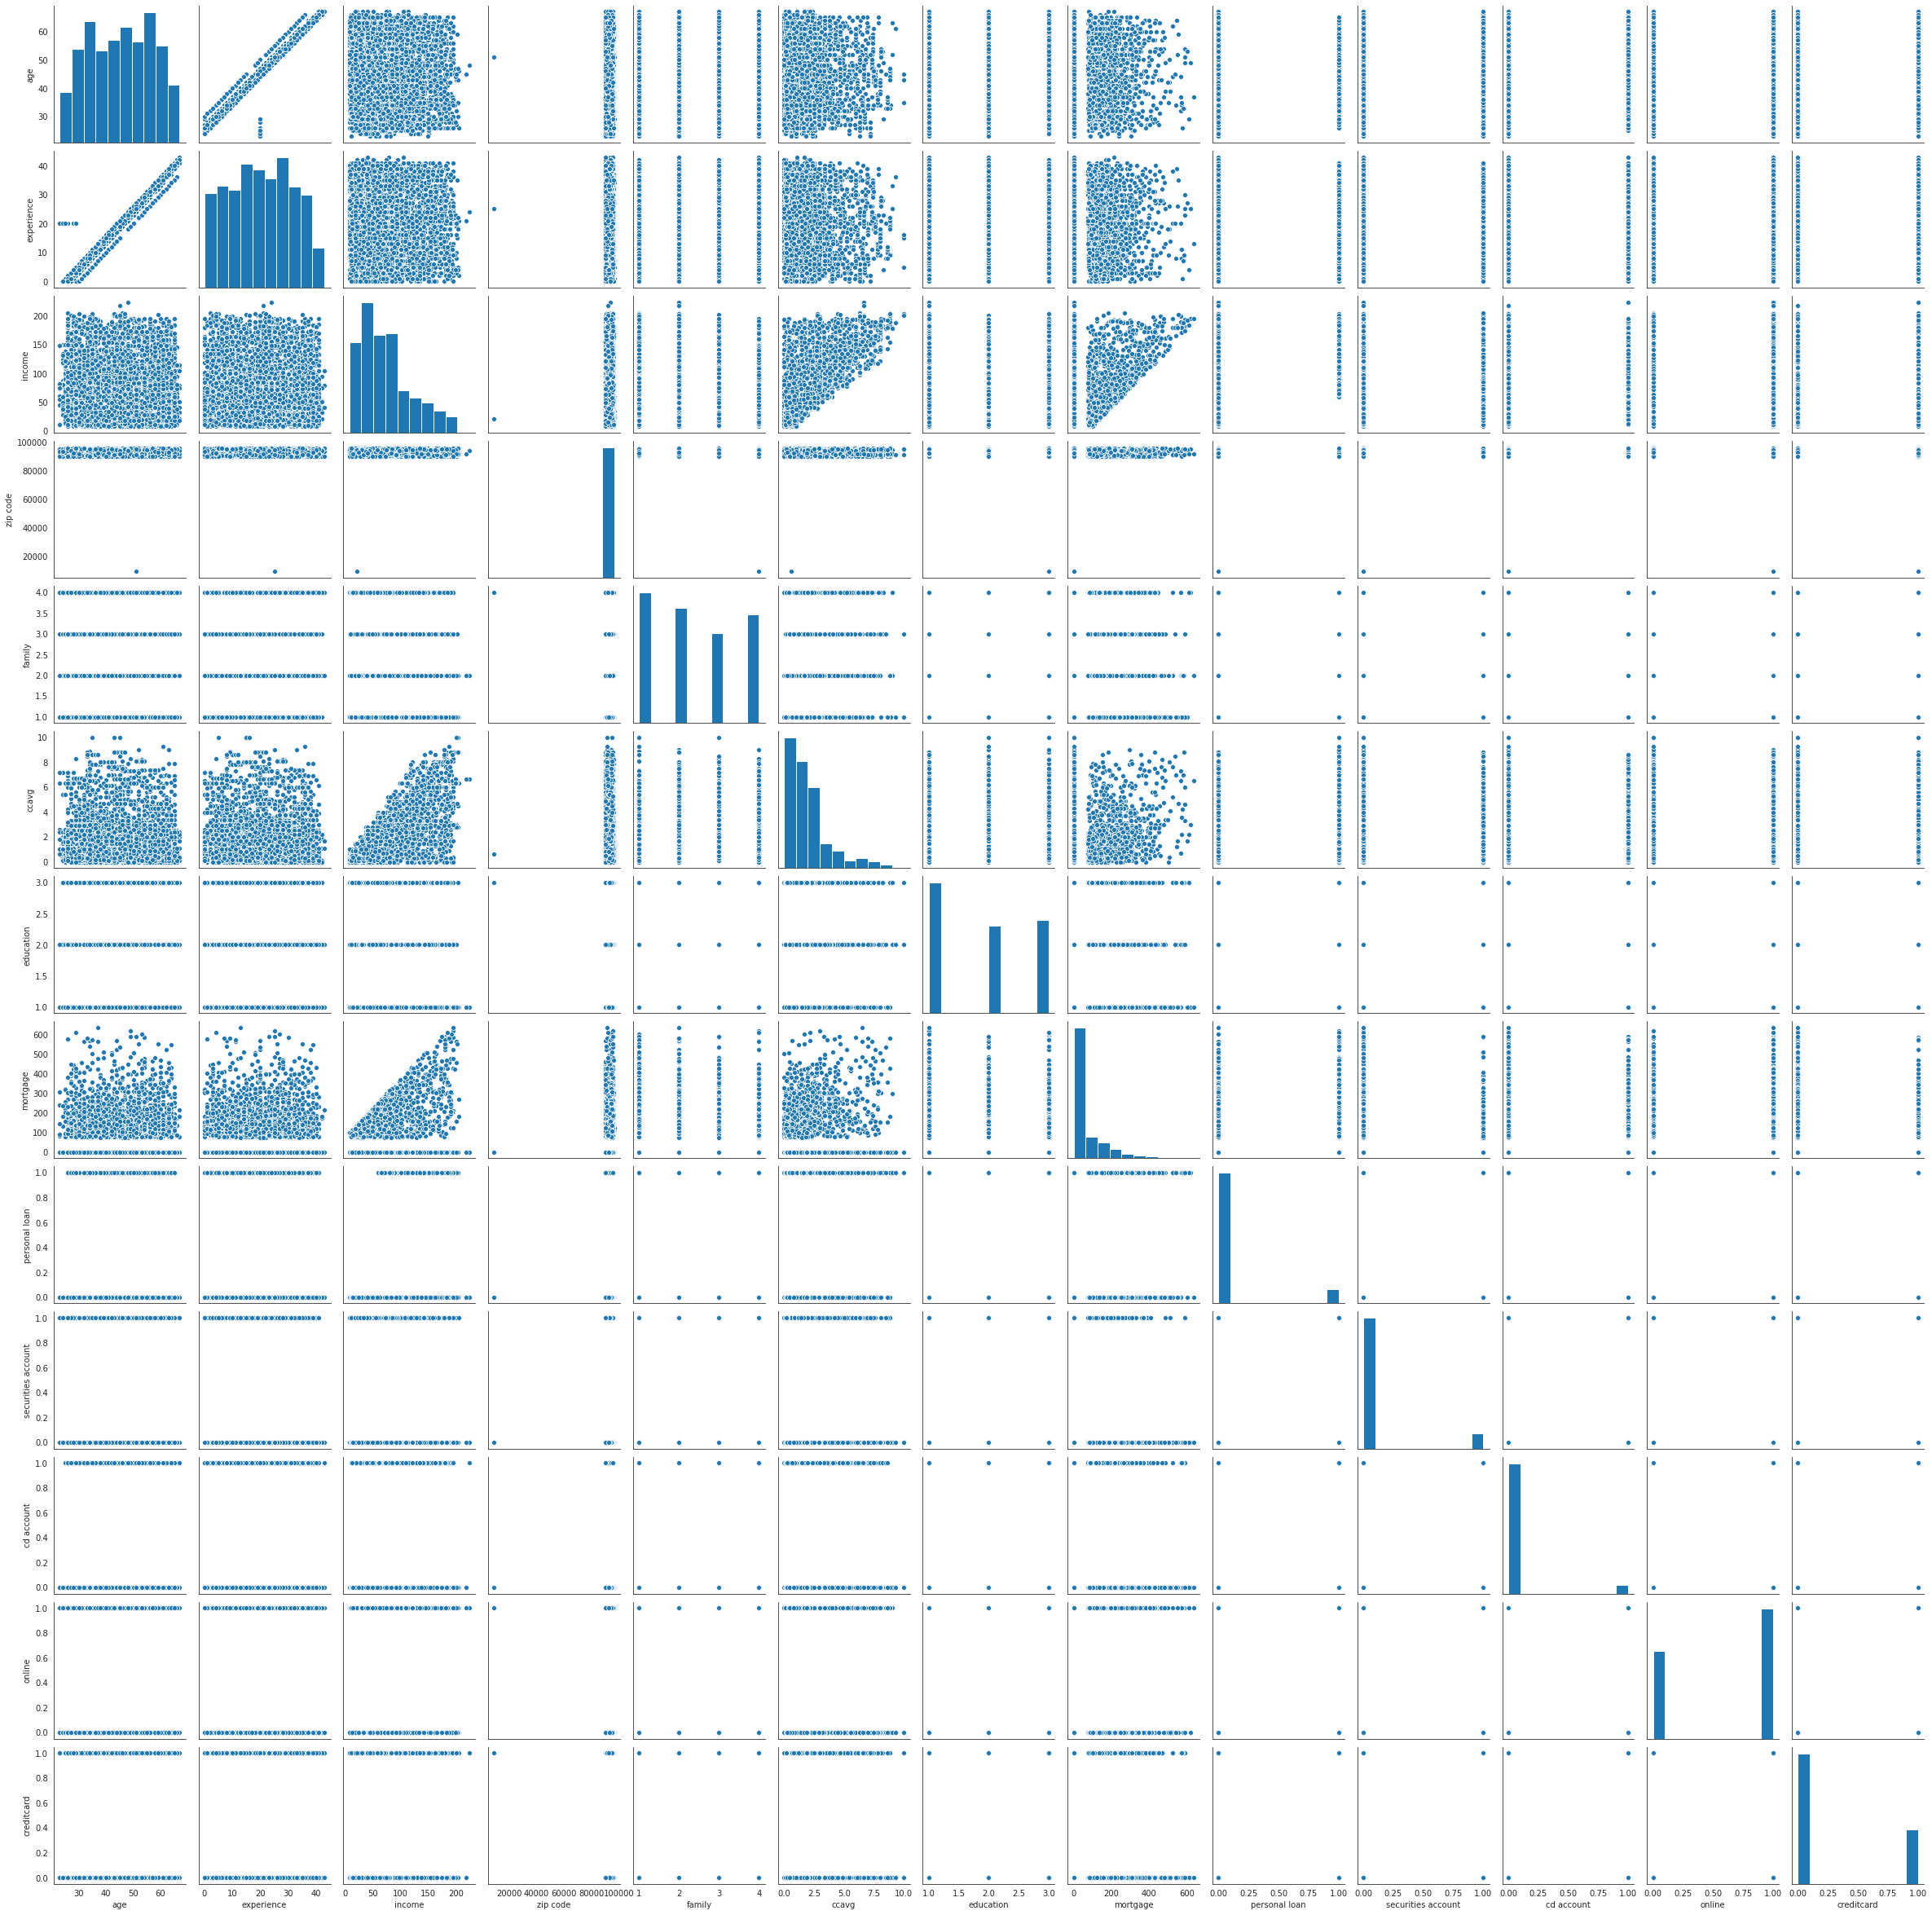

In [325]:
# A pairplot to get a broader perspective
sns.pairplot(df, palette='cubehelix');

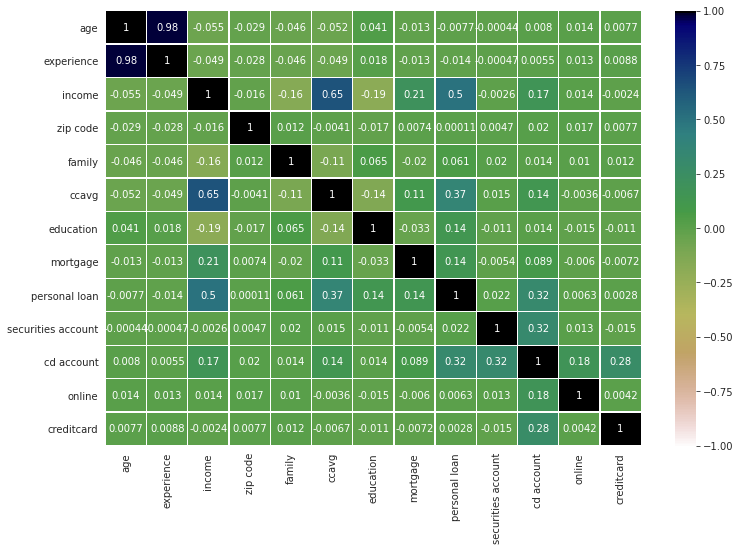

In [326]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1,center=0, cmap='gist_earth_r',linecolor='white',linewidths=0.25);

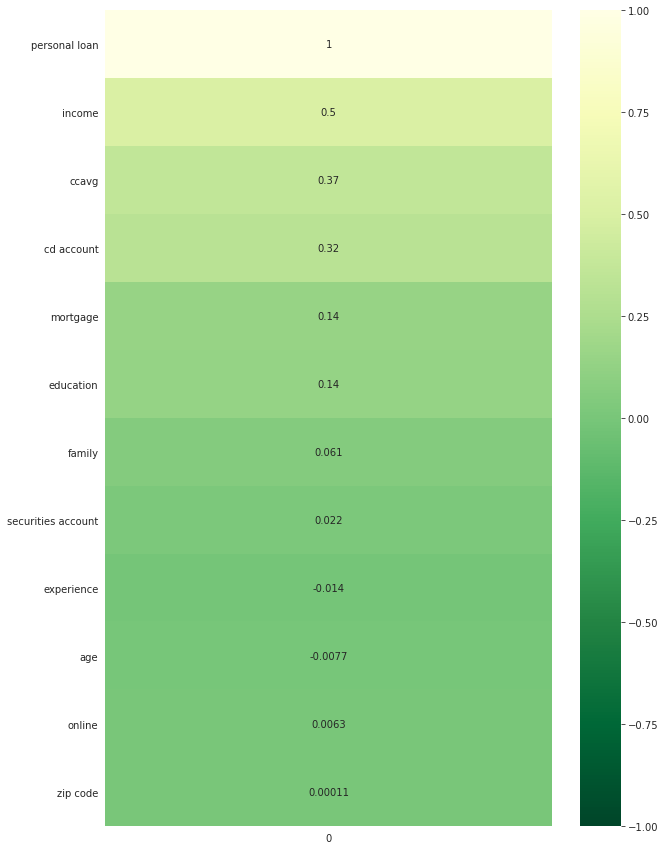

In [327]:
#correlation between all of the numeric variables in the data frame and the target-personal_loan
#Pandas’ corrwith() method return a pair-wise correlation
correlations = df.corrwith(df['personal loan']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations.to_frame(), cmap='YlGn_r', annot=True, vmin=-1, vmax=1, ax=ax);


5) Train-Test Dataset split & Feature Inspection and Transformation
In this part, we will have a close check at the distribution of all the features in our Dataset. A balanced Dataset is essential for unbiased predictions from our model.

In [328]:
# As we can see from our last plot in the Univariate Analysis, we have 2 classes in the 'Personal Loan' Feature. However, their ratio is approximately 1:10 which indicates that our Dataset is imbalanced.
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [329]:
# Let's first separate out our output column 'personal loan'

data_X = df.loc[:, df.columns != "personal loan"]
data_Y = df[["personal loan"]]

In [330]:
X_train, X_test ,y_train, y_test = train_test_split(data_X, data_Y, test_size=0.30, stratify=data_Y, random_state=0)
X_train.reset_index(drop=True, inplace=True);
X_test.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);
y_test.reset_index(drop=True, inplace=True);

Now, let's check each of our Numerical & Ordinal Categorical features in train_X set for Skewness and Outliers. Outliers affect the learning performance thus it is very essential to perform Outlier analysis for each feature, one-by-one. For each feature, we will check two plot, Normalized histogram using distplot() to check Skewness and Boxplot to check for Outliers.Then, for Skewed data, we will apply suitable Transformation to remove the Outliers and reduce the Skewness. Outliers Analysis is not reauired for other Nominal or Binary Categorical features.

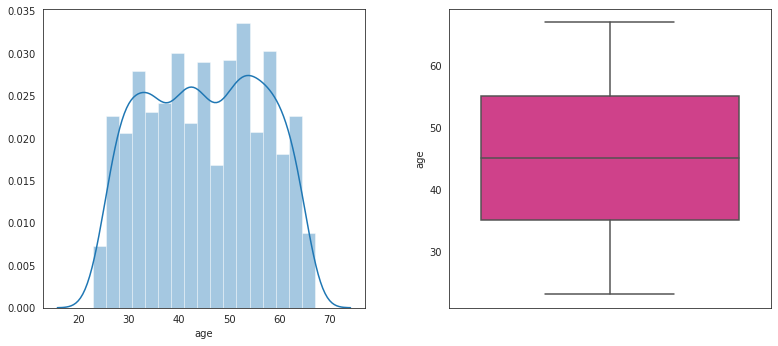

In [386]:
# Feature 1: 'Age' is our Numerical interval data.

fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.distplot(X_train["age"], ax=axes[0]);
sns.boxplot(X_train["age"], orient="vertical", ax=axes[1], palette = 'Dark2_r')

fig.tight_layout(pad=5.0)

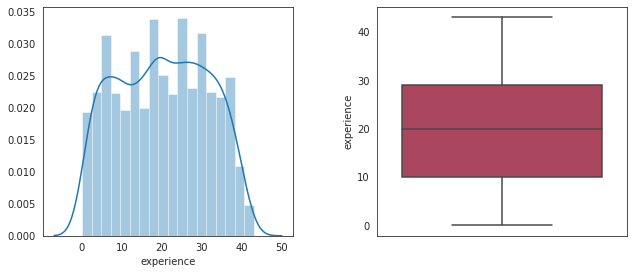

In [332]:
# Feature 2: 'Experience' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["experience"], ax=axes[0]);
sns.boxplot(X_train["experience"], orient="vertical", palette="inferno_r", ax=axes[1])

fig.tight_layout(pad=5.0)

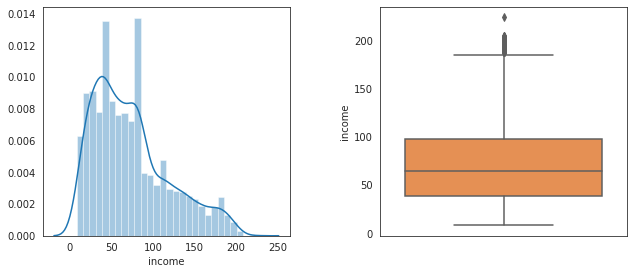

In [333]:
# Feature 3: 'Income' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["income"], ax=axes[0]);
sns.boxplot(X_train["income"], orient="v", palette="Oranges", ax=axes[1]);

fig.tight_layout(pad=5.0)

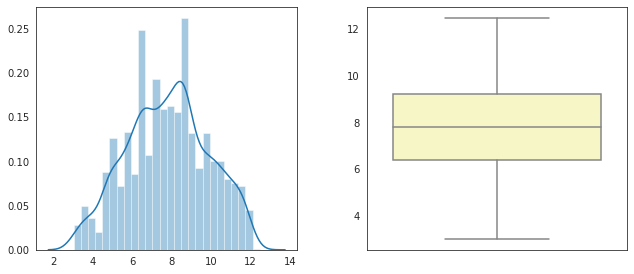

In [334]:
pt_income = PowerTransformer(method="yeo-johnson", standardize=False)

pt_income.fit(X_train["income"].values.reshape(-1, 1))

pti = pt_income.transform(X_train["income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(pti, ax=axes[0]);
sns.boxplot(pti, orient="v", palette="Spectral_r", ax=axes[1])

fig.tight_layout(pad=5.0)

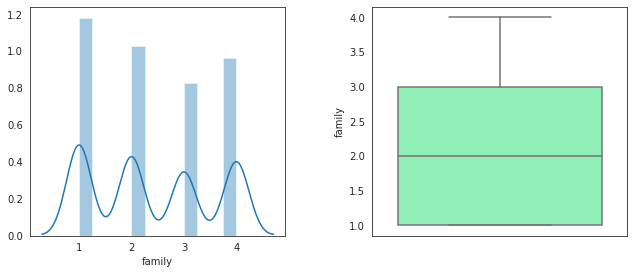

In [335]:
# Feature 4: 'Family' is our Ordinal Categorical data.
fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["family"], ax=axes[0]);
sns.boxplot(X_train["family"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

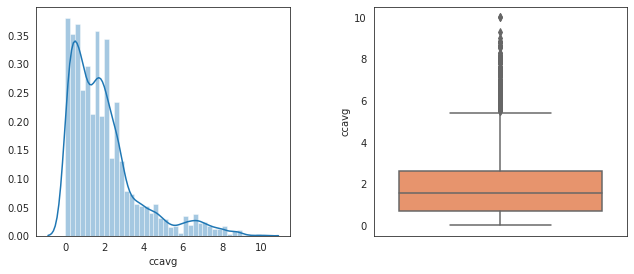

In [389]:

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["ccavg"], ax=axes[0]);
sns.boxplot(X_train["ccavg"], orient="v", palette="OrRd", ax=axes[1])

fig.tight_layout(pad=5.0)

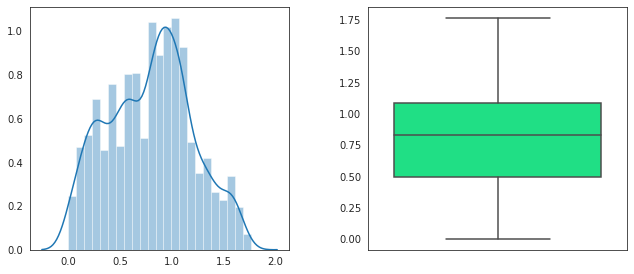

In [337]:
pt_ccavg = PowerTransformer(method="yeo-johnson", standardize=False)

pt_ccavg.fit(X_train["ccavg"].values.reshape(-1, 1))

ptc = pt_ccavg.transform(X_train["ccavg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(ptc, ax=axes[0]);
sns.boxplot(ptc, orient="v", palette="gist_rainbow_r", ax=axes[1])

fig.tight_layout(pad=5.0)

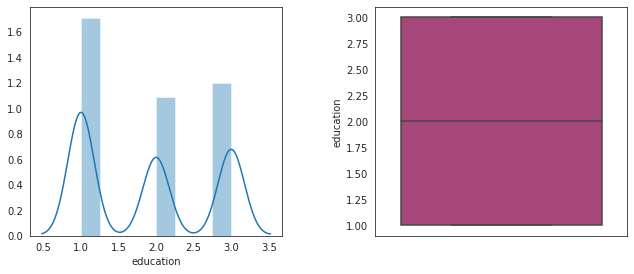

In [338]:
# Feature 6: 'Education' is our Ordinal Categorical data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["education"], ax=axes[0]);
sns.boxplot(X_train["education"], orient="v", palette="magma", ax=axes[1])

fig.tight_layout(pad=5.0)

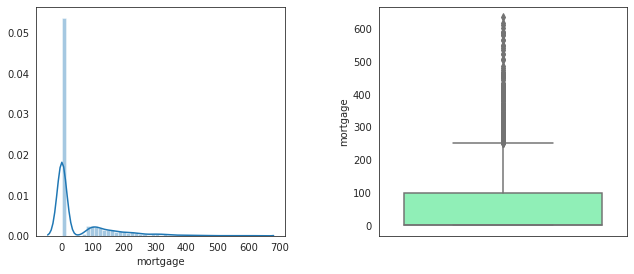

In [339]:
# Feature 7: 'Mortgage' is our Numerical Interval data.

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.distplot(X_train["mortgage"], ax=axes[0]);
sns.boxplot(X_train["mortgage"], orient="v", palette="rainbow", ax=axes[1])

fig.tight_layout(pad=5.0)

In [340]:
X_train["int_mortgage"] = pd.cut(X_train["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_train.drop("mortgage", axis=1, inplace=True)

X_test["int_mortgage"] = pd.cut(X_test["mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)

X_test.drop("mortgage", axis=1, inplace=True)

Now let's perform 'Standardization' on our Dataset to increase our learning performance. StandardScaler of scikit-learn will be used. A StandardScaler is fit to the feature in X_train, then this scaler transforms the same feature in X_train and X_test. This process is repeated for all features.

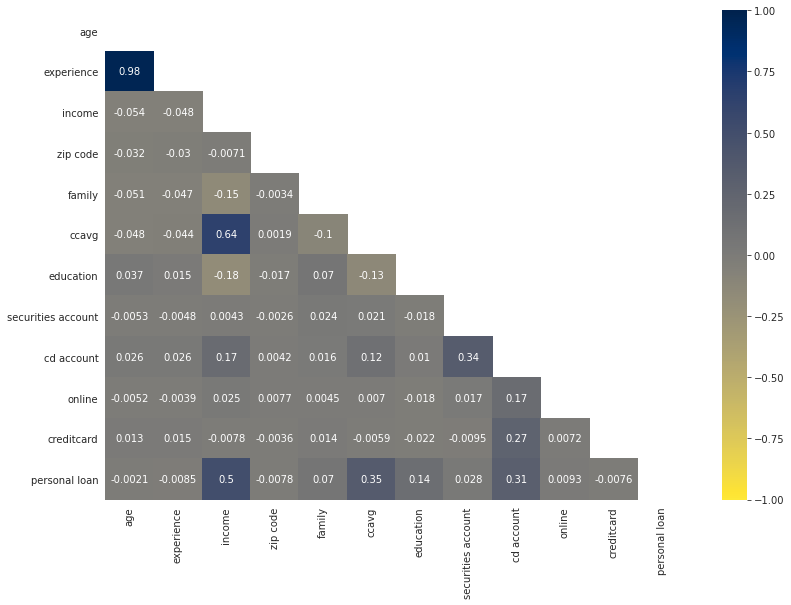

In [341]:
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0, mask=mask,cmap="cividis_r");

Age and Experience features have very high correlation, 0.99. It is also intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models. We drop Experience feature from both train_X and test_X.

In [342]:
X_train.drop("experience", axis=1, inplace=True)
X_test.drop("experience", axis=1, inplace=True)

## **Model Training & Prediction**

In [343]:
logmodel = LogisticRegression();
logmodel.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [344]:
logmodel.score(X_train, y_train)

0.9071428571428571

In [345]:
logmodel.score(X_test, y_test)

0.9106666666666666

In [346]:
logmodel_predict = logmodel.predict(X_test)

In [347]:
cm_logmodel = confusion_matrix(y_test, logmodel_predict, labels=[0,1])
print(cm_logmodel)

print(classification_report(y_test,logmodel_predict))

acc_score = accuracy_score(y_test, logmodel_predict)
f1_score = f1_score(y_test, logmodel_predict)
print("Accuracy Score  for Logistic Regression is: {}".format(acc_score * 100))
print("F1 Score  for Logistic Regression is: {}".format(f1_score * 100))

[[1318   38]
 [  96   48]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1356
           1       0.56      0.33      0.42       144

    accuracy                           0.91      1500
   macro avg       0.75      0.65      0.68      1500
weighted avg       0.90      0.91      0.90      1500

Accuracy Score  for Logistic Regression is: 91.06666666666666
F1 Score  for Logistic Regression is: 41.73913043478261


## **K-Nearest Neighbours (KNN) Model**

In [348]:
knn_model = KNeighborsClassifier(n_neighbors=21)

In [349]:
knn_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [350]:
KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [351]:
knn_model.score(X_test, y_test)

0.9026666666666666

In [352]:
knn_predict = knn_model.predict(X_test)

In [353]:
cm_knn_model = confusion_matrix(y_test, knn_predict)
print(cm_knn_model)

print(classification_report(y_test, knn_predict))


[[1333   23]
 [ 123   21]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1356
           1       0.48      0.15      0.22       144

    accuracy                           0.90      1500
   macro avg       0.70      0.56      0.59      1500
weighted avg       0.87      0.90      0.88      1500



##  **Naive Bayes Model**

In [354]:
nb_model = GaussianNB()

In [355]:
nb_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [356]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [357]:
nb_model.score(X_train, y_train)

0.8837142857142857

In [358]:
nb_model.score(X_test, y_test)

0.8933333333333333

In [359]:
nb_predict = nb_model.predict(X_test)

In [360]:
cm_nb_model = confusion_matrix(y_test, nb_predict)
print(cm_nb_model)

print(classification_report(y_test, nb_predict))



[[1253  103]
 [  57   87]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.46      0.60      0.52       144

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500



## **Random Forest Classifier**

In [361]:
rfmodel = RandomForestClassifier(max_depth=2)

In [362]:
rfmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [363]:
RandomForestClassifier(max_depth=2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## **Prediction and Evaluation**

In [364]:
rfmodel.score(X_train, y_train)

0.9131428571428571

In [365]:
rfmodel.score(X_test, y_test)

0.916

In [366]:
rf_predict = rfmodel.predict(X_test)

In [367]:
cm_rfmodel = confusion_matrix(y_test, rf_predict)
print(cm_rfmodel)

print(classification_report(y_test, rf_predict))


[[1356    0]
 [ 126   18]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1356
           1       1.00      0.12      0.22       144

    accuracy                           0.92      1500
   macro avg       0.96      0.56      0.59      1500
weighted avg       0.92      0.92      0.89      1500



## **Random Forest Classifier**

In [368]:
rfmodel = RandomForestClassifier(max_depth=2)

In [369]:
rfmodel.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## **Prediction and Evaluation:**

In [370]:
rfmodel.score(X_train, y_train)

0.9217142857142857

In [371]:
rfmodel.score(X_test, y_test)

0.924

In [372]:
rf_predict = rfmodel.predict(X_test)

In [373]:
cm_rfmodel = confusion_matrix(y_test, rf_predict)
print(cm_rfmodel)

print(classification_report(y_test, rf_predict))


[[1356    0]
 [ 114   30]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       1.00      0.21      0.34       144

    accuracy                           0.92      1500
   macro avg       0.96      0.60      0.65      1500
weighted avg       0.93      0.92      0.90      1500



# **Decision Tree Classifier**

In [374]:
dtmodel = DecisionTreeClassifier()

In [375]:
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [376]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Prediction and Evaluation**

In [377]:
dtmodel.score(X_train, y_train)

1.0

In [378]:
dtmodel.score(X_test, y_test)

0.984

In [379]:
dt_predict = dtmodel.predict(X_test)

In [380]:
cm_dtmodel = confusion_matrix(y_test, dt_predict)
print(cm_dtmodel)

print(classification_report(y_test, dt_predict))


[[1345   11]
 [  13  131]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.91      0.92       144

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



# **Comparison of Models**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The Mean and Standard Deviation for the boxplot of LR is: 0.909200 (0.011703)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

The Mean and Standard Deviation for the boxplot of KNN is: 0.899200 (0.008998)
The Mean and Standard Deviation for the boxplot of NB is: 0.886800 (0.009042)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

The Mean and Standard Deviation for the boxplot of RF is: 0.987200 (0.003600)
The Mean and Standard Deviation for the boxplot of DT is: 0.982000 (0.004195)


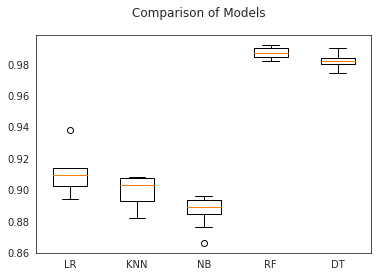

In [381]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10);
	cv_results = cross_val_score(model, data_X, data_Y, cv=kfold, scoring=scoring);
	results.append(cv_results);
	names.append(name);
	msg = "The Mean and Standard Deviation for the boxplot of %s is: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison of Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# **ROC & AUC for Classification Models**

In [382]:
#Perform Predictions for all the models
PRED_PROB_LOG_RAW=logmodel.predict_proba(X_test)
PRED_PROB_KNN_RAW=knn_model.predict_proba(X_test)
PRED_PROB_NB_RAW=nb_model.predict_proba(X_test)
PRED_PROB_RF_RAW=rfmodel.predict_proba(X_test)
PRED_PROB_DT_RAW=dtmodel.predict_proba(X_test)

In [383]:
fpr1, tpr1, thresh1 = roc_curve(y_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test, PRED_PROB_KNN_RAW[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test, PRED_PROB_NB_RAW[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test, PRED_PROB_RF_RAW[:,1], pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(y_test, PRED_PROB_DT_RAW[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


AUC_LOG_RAW = roc_auc_score(y_test,PRED_PROB_LOG_RAW[:,1])
AUC_KNN_RAW=roc_auc_score(y_test,PRED_PROB_KNN_RAW[:,1])
AUC_NB_RAW=roc_auc_score(y_test,PRED_PROB_NB_RAW[:,1])
AUC_RF_RAW=roc_auc_score(y_test,PRED_PROB_RF_RAW[:,1])
AUC_DT_RAW=roc_auc_score(y_test,PRED_PROB_DT_RAW[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW, AUC_KNN_RAW, AUC_NB_RAW, AUC_RF_RAW, AUC_DT_RAW])

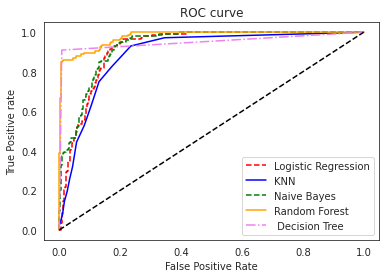

In [384]:

plt.plot(fpr1,tpr1,linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes')
plt.plot(fpr4,tpr4,linestyle='solid',color='orange', label='Random Forest')
plt.plot(fpr5,tpr5,linestyle='-.',color='violet',label=' Decision Tree')


plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

# **Conclusion**

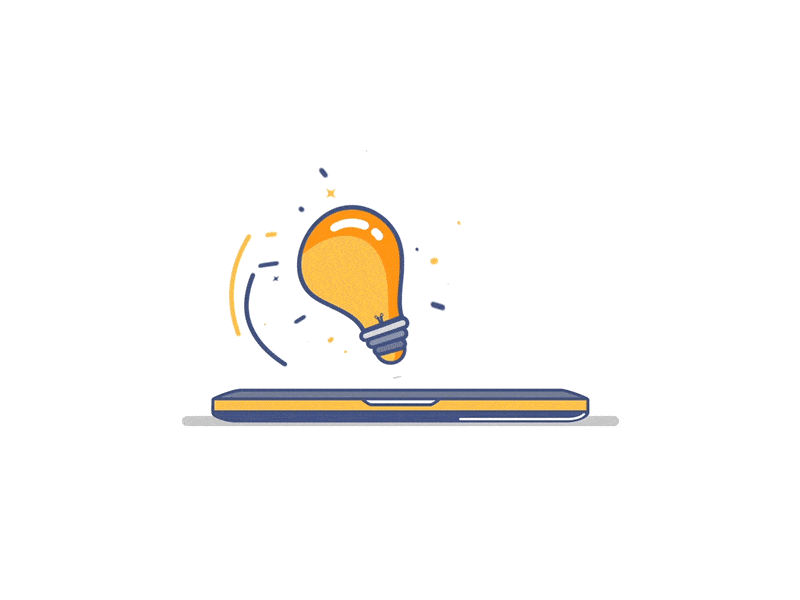




The main objective of this project is to increase the effectiveness of the bank's telemarketing campaign, which was successfully met through data analysis, visualization and analytical model building. A target customer profile was established while classification and regression models were built to predict customers' response to the term deposit campaign.

* According to previous analysis, a target customer profile can be established.
*   By applying different algorithms, classification and estimation model were successfully built. With these models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. 

*   In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase
 1. the efficiency of the bank’s marketing campaign
 2. saving time and effort
 3.it prevents some clients from receiving undesirable advertisements
 4. raising customer satisfaction.
 5. With the aid of the  models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.





# **Acknowledgements**
This data set was given as part of course in machine learning. I have also added my observations on the data.It give us immense pleasure to express my gratitude to sir. I thank my faculty for giving an opportunity to work on this dataset.
(/content/datasets_48024_87370_Bank_Personal_Loan_Modelling.xlsx)

# **THANK YOU**